In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ba52bfd1763642ea89a0541fbea6f391 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OXVg5g75fFg-LOPMJKL05prWFobZl2N3N4KTcT4928to',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_ba52bfd1763642ea89a0541fbea6f391.get_object(Bucket='h1bvisaapproval-donotdelete-pr-qmzfnxaxqde6l3',Key='h1b_kaggle.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [4]:
df

Unnamed: 0          CASE_STATUS  \
0                 1  CERTIFIED-WITHDRAWN   
1                 2  CERTIFIED-WITHDRAWN   
2                 3  CERTIFIED-WITHDRAWN   
3                 4  CERTIFIED-WITHDRAWN   
4                 5            WITHDRAWN   
...             ...                  ...   
3002453     3002454                  NaN   
3002454     3002455                  NaN   
3002455     3002456                  NaN   
3002456     3002457                  NaN   
3002457     3002458                  NaN   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
...                                                    ...   
3002453                                                NaN   
3002454                                                NaN   
3002455                                                NaN   
3002456                                                NaN   
3002457                                                NaN   

                              SOC_NAME                     JOB_TITLE  \
0        BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1                     CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2                     CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3                     CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4                     CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   
...                                ...                           ...   
3002453                            NaN                           NaN   
3002454                            NaN                           NaN   
3002455                            NaN                           NaN   
3002456                            NaN                           NaN   
3002457                            NaN                           NaN   

        FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                        N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                        Y         242674.0  2016.0             PLANO, TEXAS   
2                        Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                        Y         220314.0  2016.0         DENVER, COLORADO   
4                        Y         157518.4  2016.0      ST. LOUIS, MISSOURI   
...                    ...              ...     ...                      ...   
3002453                NaN              NaN     NaN            NYC, NEW YORK   
3002454                NaN              NaN     NaN        SOUTH LAKE, TEXAS   
3002455                NaN              NaN     NaN      CLINTON, NEW JERSEY   
3002456                NaN              NaN     NaN    OWINGS MILL, MARYLAND   
3002457                NaN              NaN     NaN         ALTANTA, GEORGIA   

                lon        lat  
0        -83.743038  42.280826  
1        -96.698886  33.019843  
2        -74.077642  40.728158  
3       -104.990251  39.739236  
4        -90.199404  38.627003  
...             ...        ...  
3002453  -74.005941  40.712784  
3002454  -97.134178  32.941236  
3002455  -74.909890  40.636768  
3002456  -76.780253  39.419550  
3002457  -84.387982  33.748995  

[3002458 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [6]:
df.CASE_STATUS.value_counts() 

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

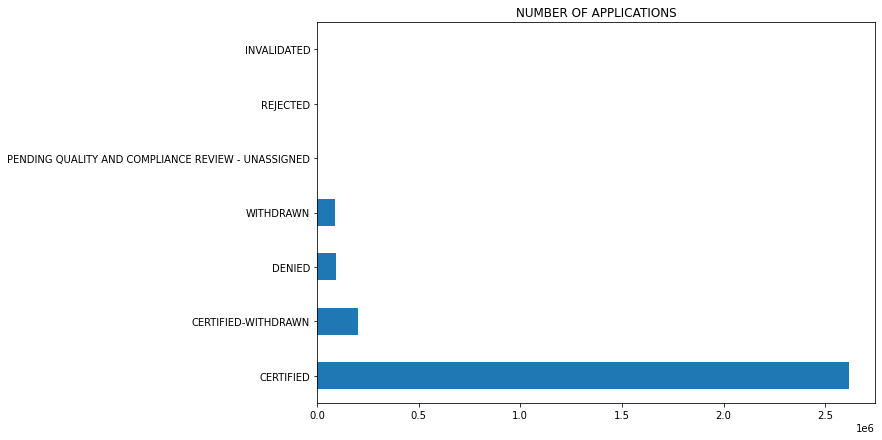

In [7]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot:>

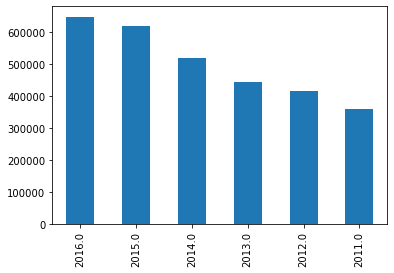

In [8]:
df.YEAR.value_counts().plot(kind = 'bar')

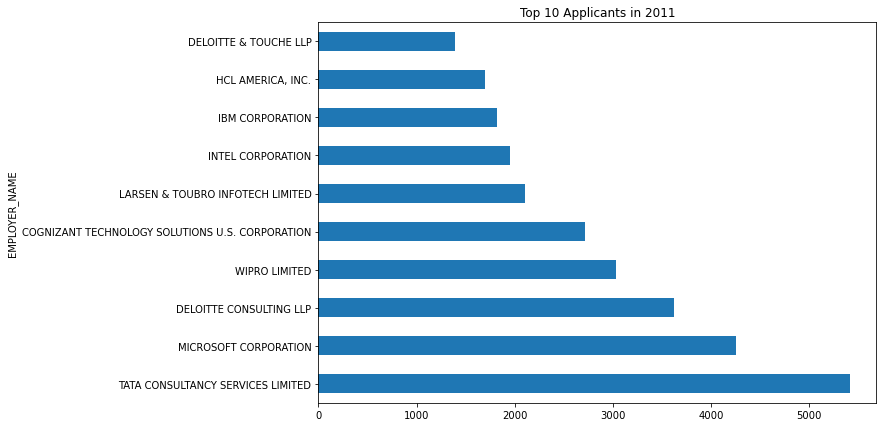

In [9]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2011")
ax1.set_label("")
plt.show()

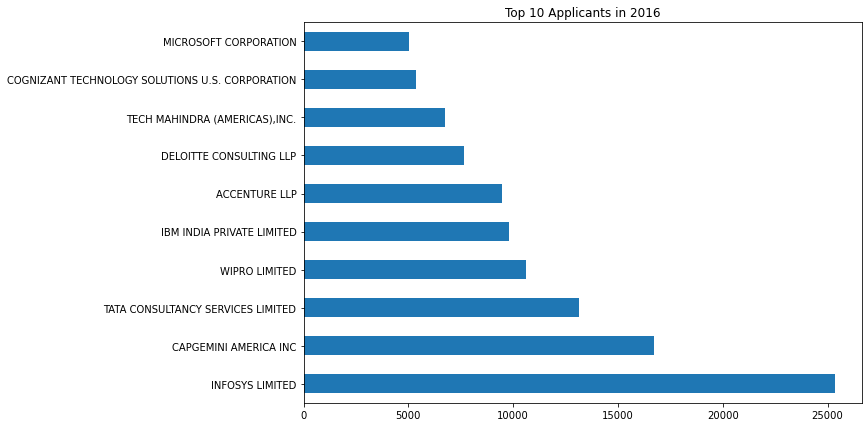

In [10]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

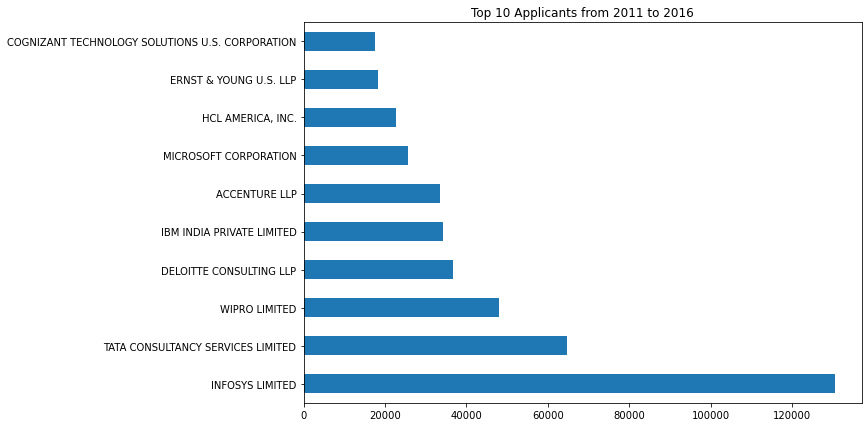

In [11]:
plt.figure(figsize=(10,7))

ax3 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

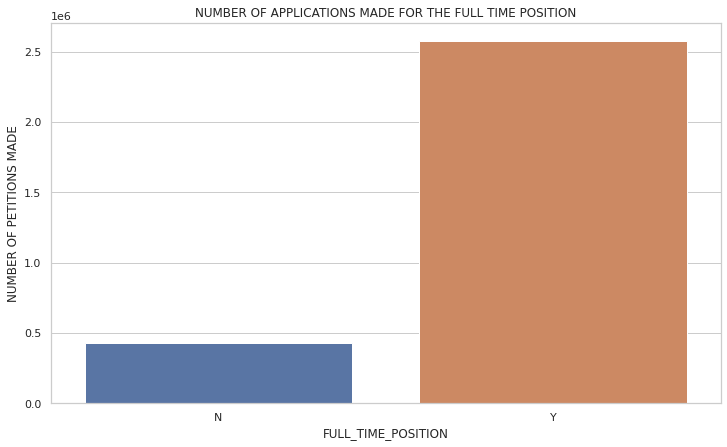

In [12]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [13]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

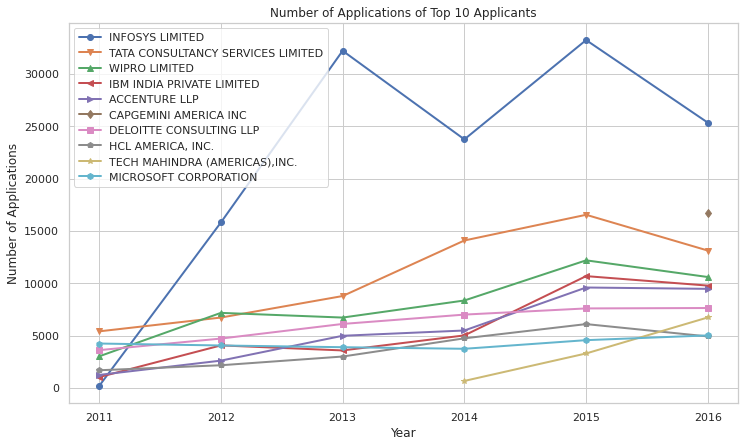

In [14]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

## Removing Outliers

In [15]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

## Checking for Null values

In [16]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [17]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

/tmp/wsuser/ipykernel_301/3128512436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])


In [18]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME                   0
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

## Label Encoding Case status

In [19]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

/tmp/wsuser/ipykernel_301/3378111941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})


In [20]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

/tmp/wsuser/ipykernel_301/1045364823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})


Unnamed: 0  CASE_STATUS                                      EMPLOYER_NAME  \
0           1            1                             UNIVERSITY OF MICHIGAN   
1           2            1                             GOODMAN NETWORKS, INC.   
2           3            1                          PORTS AMERICA GROUP, INC.   
3           4            1  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4           5            3                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

   FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                   0          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                   1         242674.0  2016.0             PLANO, TEXAS   
2                   1         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                   1         220314.0  2016.0         DENVER, COLORADO   
4                   1         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [21]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

/tmp/wsuser/ipykernel_301/938964257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'] = 'others'
/tmp/wsuser/ipykernel_301/938964257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [22]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [23]:
df.head()

CASE_STATUS  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR SOC_NAME1
0            1                   0          36067.0  2016.0    others
1            1                   1         242674.0  2016.0    others
2            1                   1         193066.0  2016.0    others
3            1                   1         220314.0  2016.0    others
4            3                   1         157518.4  2016.0    others

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [25]:
df = df.drop(['SOC_NAME1'], axis=1)

<AxesSubplot:>

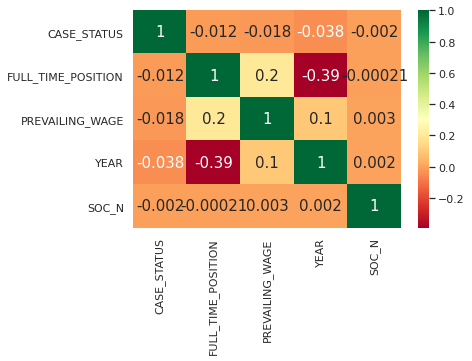

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [27]:
df.isnull().sum()

CASE_STATUS           0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
SOC_N                 0
dtype: int64

In [28]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Modelling Fitting by using RandomForest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/tmp/wsuser/ipykernel_301/2782890027.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [31]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.47      0.09      0.16     60711
           2       0.24      0.04      0.07     27545
           3       0.15      0.01      0.02     27253
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.87    899974
   macro avg       0.29      0.19      0.20    899974
weighted avg       0.81      0.87      0.82    899974



In [33]:
c(y_pred_rf)

Counter({0: 881574, 1: 12154, 2: 4556, 3: 1690})

In [34]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.8687839870929605

In [35]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))

In [36]:
pip install ibm_watson_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [37]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"TC_5gO5FshF_PS3XRD0DpP4Dg-PYgbbWssRd5G7dwyPY"
                  }
client = APIClient(wml_credentials)

In [38]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client, 'models')
print("space UID = " + space_uid)

space UID = fd717ce6-173f-4961-bad7-015df1f71da4


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [42]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [43]:
model_details = client.repository.store_model(model=rf,meta_props={
client.repository.ModelMetaNames.NAME:"H1BVisa_modeling",
client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/repository.py:1458: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [45]:
model_id

'dcd1c61c-8e66-469e-8898-cba30153a6d9'

In [47]:
client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [49]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

NameError: name 'DEPLOYMENT_NAME' is not defined